# Import Dataset & Libraries

In [1]:
import numpy as np
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

trainset = datasets.MNIST('', download=True, train=True, transform=transforms.ToTensor())
testset = datasets.MNIST('', download=True, train=False, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 22876012.34it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1420413.38it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10419720.33it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6024835.16it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



# Visualize A Sample Image and Its Label

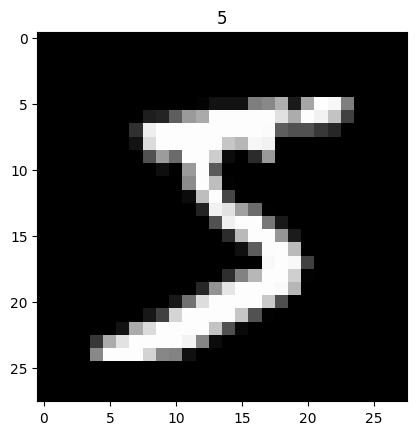

In [2]:
plt.imshow(trainset.data[0], cmap='gray')
plt.title('%i' % trainset.targets[0])
plt.show()

# DataLoaders and Batch Size

In [3]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Convolutional Neural Network

In [4]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.network = nn.Sequential(

        nn.Conv2d(1, 16, kernel_size = 5, stride = 1, padding = 2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),

        nn.Conv2d(16, 32, kernel_size = 5, stride = 1, padding = 2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),

        nn.Flatten(),
        nn.Linear(32 * 7 * 7, 10)
        )

    def forward(self, x):
        x = self.network(x)
        return x

In [6]:
model = CNN()
print(model)

CNN(
  (network): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1568, out_features=10, bias=True)
  )
)


# Model Training

In [7]:
from torch import optim

lossFunction = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [8]:
num_epochs = 10
for epoch in range(num_epochs):
    loss_ = 0
    for images, labels in train_loader:
        
        # Forward Pass
        output = model(images)
        loss = lossFunction(output, labels)

        # Backpropogation
        optimizer.zero_grad()
        loss.backward()

        # Update parameters
        optimizer.step()

        loss_ += loss.item()
    print("Epoch{}, Training loss:{}".format(epoch, loss_ / len(train_loader)))

Epoch0, Training loss:0.12935037822298792
Epoch1, Training loss:0.04446285694149007
Epoch2, Training loss:0.031876972101126506
Epoch3, Training loss:0.025741056793513073
Epoch4, Training loss:0.021131091417812914
Epoch5, Training loss:0.018872490182450713
Epoch6, Training loss:0.014479665547379578
Epoch7, Training loss:0.013990322010915003
Epoch8, Training loss:0.012087248774296235
Epoch9, Training loss:0.013838866216246


# Model Testing

In [10]:
with torch.no_grad():
    correct = 0
    total = 0
    all_labels = []
    all_predicted = []
    for images, labels in test_loader:
        out = model(images)
        _, predicted = torch.max(out, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.append(labels.numpy())
        all_predicted.append(predicted.numpy())
    print('Testing accuracy: {} %'.format(100 * correct / total))

Testing accuracy: 99.0 %


In [11]:
# concatenate all predictions and labels in a single array each
all_predicted_np = np.concatenate(all_predicted, axis=0)
all_labels_np = np.concatenate(all_labels, axis=0)

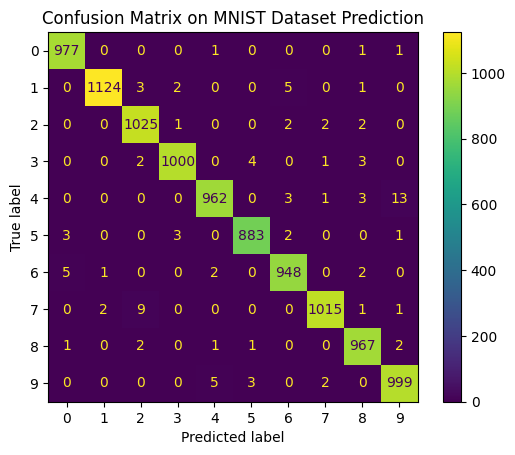

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(all_labels_np, all_predicted_np)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = None)
cm_display.plot()
plt.title('Confusion Matrix on MNIST Dataset Prediction')
plt.show()